In [148]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

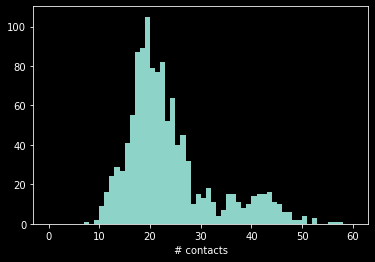

In [149]:
# Generate dummy data and lockdown scenario
f = 0.5
mu = 20 

xx_1 = np.round(np.random.poisson(mu, 10000))
xx_2 = np.round(np.random.poisson(2*mu, 2000))
xx = np.concatenate((xx_1, xx_2))

plt.hist(xx, bins = int(60-0), range=(0, 60))
plt.xlabel('# contacts')
plt.show()

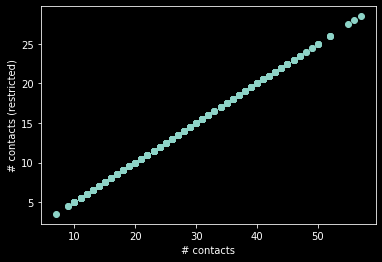

Achieved accuracy
1.0


In [150]:
# Reference: Scale all contacts by f
fun_1 = np.vectorize(lambda y : f * y)

plt.scatter(xx, fun_1(xx))
plt.xlabel('# contacts')
plt.ylabel('# contacts (restricted)')
plt.show()

print('Achieved accuracy')
print(np.mean(fun_1(xx)) / np.mean(xx) / f)

Full form
Validate scaling of function (should print 1)
1.0


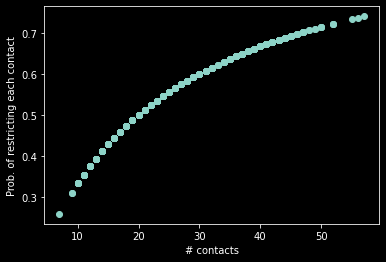

Simplified form
Validate scaling of function (should print 1)
1.0


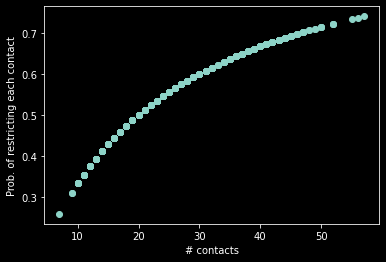

In [151]:
# Use generalized logistic functions instead of linear scaling
nu = - np.log(1-f) / np.log(2)
k = 1

glf = np.vectorize(lambda y, k, nu : 1 / (1+np.exp(-k*np.log(y/mu)))**(nu))
print('Full form')
print('Validate scaling of function (should print 1)')
print(glf(mu, k, nu)/(1-f))

plt.scatter(xx, glf(xx, k, nu))
plt.xlabel('# contacts')
plt.ylabel('Prob. of restricting each contact')
plt.show()

glf_a = np.vectorize(lambda y, k, nu : 1 / (1+(mu/y)**k)**(nu))
print('Simplified form')
print('Validate scaling of function (should print 1)')
print(glf_a(mu, k, nu)/(1-f))

plt.scatter(xx, glf_a(xx, k, nu))
plt.xlabel('# contacts')
plt.ylabel('Prob. of restricting each contact')
plt.show()

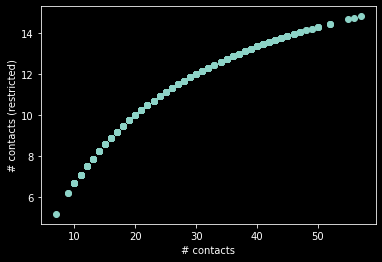

Achieved accuracy
0.8963598506258241


In [152]:
fun_1 = np.vectorize(lambda y : y * (1 - glf_a(y, k, nu)))

plt.scatter(xx, fun_1(xx))
plt.xlabel('# contacts')
plt.ylabel('# contacts (restricted)')
plt.show()

print('Achieved accuracy')
print(np.mean(fun_1(xx)) / np.mean(xx) / f)

In [153]:
# Introduce scaling factor "t" to improve accuracy
# Test accuracy over range of f
from functools import partial

nu_f = lambda f : - np.log(1-f) / np.log(2)
glf_b = np.vectorize(lambda y, k, t, nu : 1 / (1+(t*mu/y)**k)**(nu))
fun_4 = np.vectorize(lambda t, f, k, y : y * (1 - glf_b(y, k, t, nu_f(f))))

ratio = np.vectorize(lambda t, k, f : np.mean(partial(fun_4, t, f, k)(xx)) / np.mean(xx) / f)

ff = np.linspace(0.01, 0.99)

In [154]:
r_1   = ratio(1,    k, ff)
r_11  = ratio(1.1,  k, ff)
r_12  = ratio(1.2,  k, ff)
r_13  = ratio(1.3,  k, ff)
r_125 = ratio(1.25, k, ff)
r_122 = ratio(1.22, k, ff)
r_121 = ratio(1.21, k, ff)

KeyboardInterrupt: 

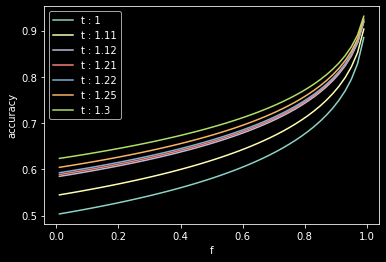

In [146]:
# Plot the accuracies
plt.plot(ff, r_1,   label='t : 1')
plt.plot(ff, r_11,  label='t : 1.11')
plt.plot(ff, r_12,  label='t : 1.12')
plt.plot(ff, r_121, label='t : 1.21')
plt.plot(ff, r_122, label='t : 1.22')
plt.plot(ff, r_125, label='t : 1.25')
plt.plot(ff, r_13,  label='t : 1.3')

plt.xlabel('f')
plt.ylabel('accuracy')

plt.legend()

plt.show()

In [147]:
print('Largest error:')
print(f'k : {k}, t : 1,    r : {np.round(np.max(np.abs(1 - r_1)),   3)}')
print(f'k : {k}, t : 1.2,  r : {np.round(np.max(np.abs(1 - r_11)),  3)}')
print(f'k : {k}, t : 1.2,  r : {np.round(np.max(np.abs(1 - r_12)),  3)}')
print(f'k : {k}, t : 1.21, r : {np.round(np.max(np.abs(1 - r_121)), 3)}')
print(f'k : {k}, t : 1.22, r : {np.round(np.max(np.abs(1 - r_122)), 3)}')
print(f'k : {k}, t : 1.25, r : {np.round(np.max(np.abs(1 - r_125)), 3)}')
print(f'k : {k}, t : 1.3,  r : {np.round(np.max(np.abs(1 - r_13)),  3)}')

Largest error:
k : 1, t : 1,    r : 0.496
k : 1, t : 1.2,  r : 0.455
k : 1, t : 1.2,  r : 0.415
k : 1, t : 1.21, r : 0.411
k : 1, t : 1.22, r : 0.407
k : 1, t : 1.25, r : 0.396
k : 1, t : 1.3,  r : 0.376
